
## Given eps= 0.1
## Total Horizon given T=10000

In [1]:
import numpy as np
from scipy import stats
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#Enter the sum of digits in your enrollment number as seed


# Return static RewardMatrix , which will tell if Customer[i] with arm j will get converted or not . 
#Algorithm might be any TS or Random
def environment(seed, customers):
  np.random.seed(seed)
  conversion_rates = np.random.uniform(0,0.2,9)
  print('conversion rate = {}'.format(conversion_rates)) 
  X = np.array(np.zeros([customers,9]))
  for i in range(customers):
    for j in range(9):
      if np.random.rand() <= conversion_rates[j]:
        X[i,j] = 1
  return X

seed = 18
customers = 10000
# Total Policies are 9
POLICY_ARM_SIZE=9
np.random.seed(seed)
conversion_rates = np.random.uniform(0,0.2,9)
conversion_matrix = environment(seed, customers)
print('Conversion Matrix={}'.format(conversion_matrix))

conversion rate = [0.13007485 0.10109067 0.17572029 0.03636805 0.17044661 0.15002726
 0.13322033 0.19757909 0.05139368]
Conversion Matrix=[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [2]:
#Creating cache to keep the # of trial and average reward given by each arm
#Arm n, have record [k trial,meanReward,Success,Failure]
rewardCache = np.zeros((POLICY_ARM_SIZE,4))
rewardCache

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [3]:
# Return reward based on the Conversion Matrix
def getReward(custIndex,action):
    return conversion_matrix[custIndex,action]

In [4]:
#This reward function update the reward and keep the track of success and failure
# If customer will get converted, we mark that as success otherwise failure.
def updateRewardCache(rewardCache,action,r):
    newMeanReward = (rewardCache[action,0] * rewardCache[action,1] + r) / (rewardCache[action,0] +
     1)
    rewardCache[action,0] += 1
    rewardCache[action,1] = newMeanReward
    if r==1:
        #Success
        rewardCache[action,2] += 1
    else:
        #Failure
        rewardCache[action,3] += 1
    return rewardCache

In [5]:
def getHighRewardArm(record):
    arm_index = np.argmax(rewardCache[:,1],axis=0)
    return arm_index

In [6]:
# this function generates Beta Sample based on Success, Failure
def beta_sample_gen(rewardCache):
    beta_samples = np.zeros(POLICY_ARM_SIZE, dtype=float)
    for x in range(POLICY_ARM_SIZE):
        beta_samples[x] = np.random.beta(rewardCache[x,2]+1, rewardCache[x,3]+1)
    return beta_samples

In [7]:
# Function to compute regret
def computeRegret(rewards):
    optimalProbablity = np.max(conversion_rates)
    regrets = []
    sum_regret=0
    sum_reward=0
    for i in range(customers):
        sum_reward+=rewards[i]
        sum_regret=(optimalProbablity*i-sum_reward)
        regrets.append(sum_regret)
    return regrets

## Qestion 1.a : Plot the histogram for the number of times each marketing strategy was selected when you deploy Thompson Sampling based AI agent. 

### Thompson Sampling

(array([  64.,  115., 5838.,   66.,    0.,  133.,  187.,  497., 3041.,
          59.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

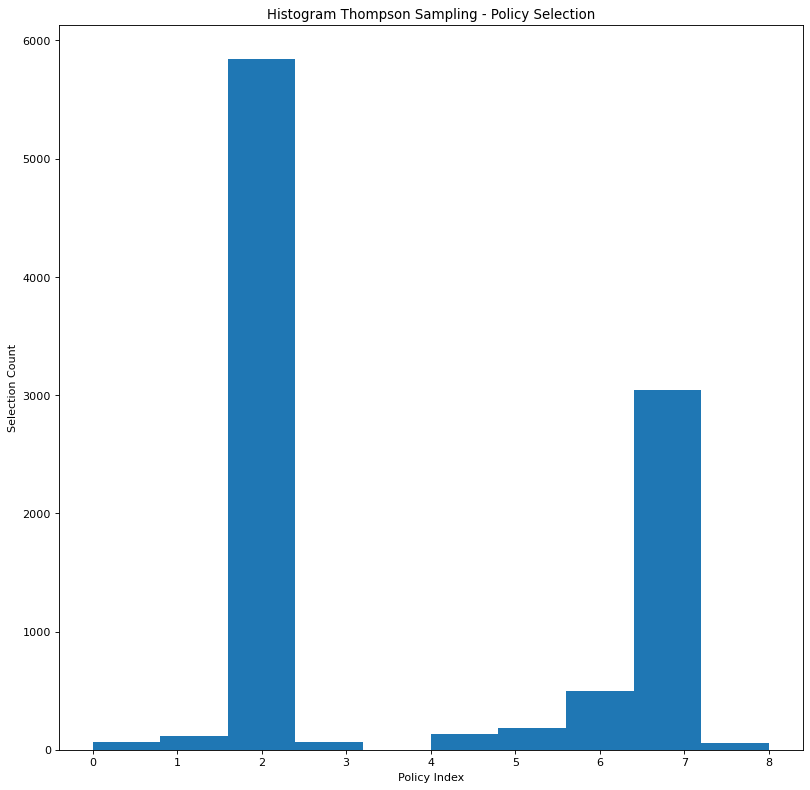

In [8]:
plt.figure(figsize=(12, 12), dpi=80)
plt.title("Histogram Thompson Sampling - Policy Selection")
plt.xlabel("Policy Index")
plt.ylabel("Selection Count")                                                       
rewards = [0]
currentReward=[]
for i in range(customers):
    beta_sample = beta_sample_gen(rewardCache)
    arm_index = np.argmax(beta_sample)
    r = getReward(i,arm_index)
    #print ('Current Customer = {}, Arm Index = {}, Reward = {}'.format(i,arm_index,r))
    rewardCache = updateRewardCache(rewardCache,arm_index,r)           
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)     
    rewards.append(mean_reward)
    currentReward.append(r)
regrets_TS = computeRegret(currentReward)
#plt.scatter(np.arange(len(regrets)),regrets,color = 'pink')
#plt.scatter(np.arange(len(rewards)),rewards,color = 'b')
histArray=[]
for i in range(9):
    for j in range(int(rewardCache[i,0])):
        histArray.append(i)

plt.hist(histArray)


- <B> Here we see that Policy  2 is got selectid most~ 5700 , which is second best policy  , Policy  7 is best policy which is selected ~3000 times.
- <B> But if we will have total 50000 customers we eventually see Policy 7 get selected  most.

## Randomised Policy Fetching

In [9]:
#Creating cache to keep the # of trial and average reward given by each arm
#Arm n, have record [k trial,meanReward,Success,Failure]
rewardCache = np.zeros((POLICY_ARM_SIZE,4))
rewardCache

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [10]:
rewards = [0]
currentReward=[]
for i in range(customers):
    arm_index = np.random.randint(9)
    r = getReward(i,arm_index)
    #print ('Current Customer = {}, Arm Index = {}, Reward = {}'.format(i,arm_index,r))
    rewardCache = updateRewardCache(rewardCache,arm_index,r)           
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)     
    rewards.append(mean_reward)
    currentReward.append(r)
regrets_random = computeRegret(currentReward)

## Question 1 (b) : Plot the regret for Thompson sampling based agent vs a random agent. Assume a random agent picks one of the nine marketing strategies uniformly at random. 

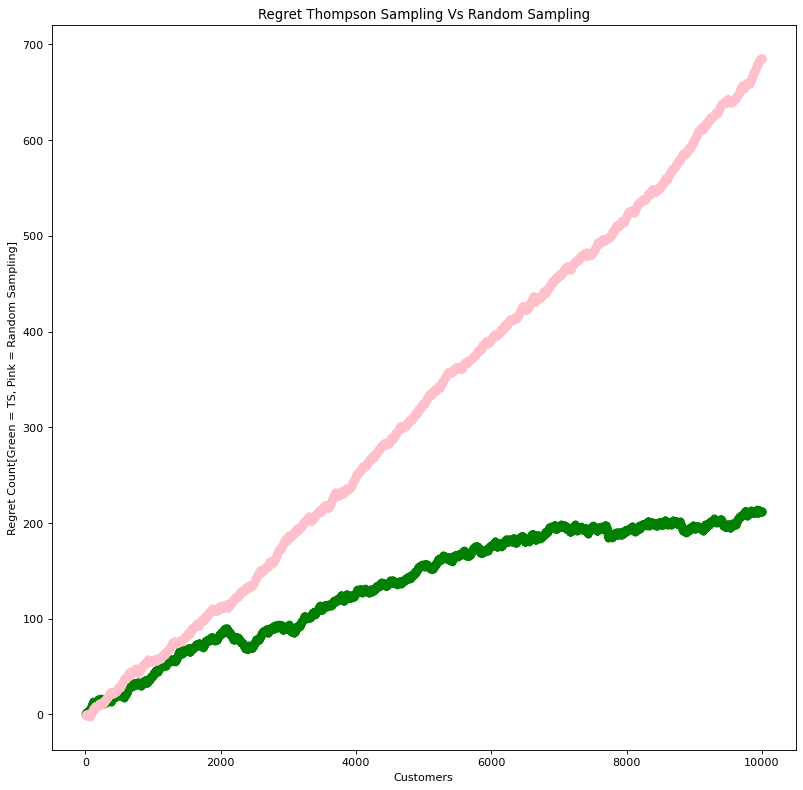

In [11]:
plt.figure(figsize=(12, 12), dpi=80)
plt.title("Regret Thompson Sampling Vs Random Sampling")
plt.xlabel("Customers")
plt.ylabel("Regret Count[Green = TS, Pink = Random Sampling]") 
plt.scatter(np.arange(len(regrets_TS)),regrets_TS,color = 'green')
plt.scatter(np.arange(len(regrets_random)),regrets_random,color = 'pink')